In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By 
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.common.keys import Keys

In [2]:
driver = webdriver.Chrome('C:/Users/Aman Bhalla/Downloads/chromedriver_win32/chromedriver')

In [3]:
driver.get('https://www.instagram.com/')
driver.implicitly_wait(10)

In [4]:
user = driver.find_element_by_name('username')
user.send_keys('SAMPLE USERNAME')

In [5]:
password = driver.find_element_by_name('password')
password.send_keys('SAMPLE PASSWORD')

In [6]:
login = driver.find_element_by_xpath('//div[starts-with(@class,Igw0E)]/button')
login.submit()

# Question 1

# Question 1.1

•	Search food in the search box using xpath of the search box.

•	Click on the search box by  .click() method.

•	Gather first insta handles as insta handles after searching food in search box.

•	Searching the top 10 insta handles by appending them to base address www.instagram.com and sending the url to driver.get()

•	After landing in the insta page no of followers of each insta handles are accessed by finding the xpath of the followers and and clicking over it 

•	Numbers of followers are stored in dictionary along with respective insta handle and top 5 handles are printed.


In [7]:
search_box = driver.find_element_by_xpath("//div[starts-with(@class,LWmhU)]/input")
search_box.send_keys('food')

In [8]:
lis = driver.find_elements_by_class_name('Ap253')
lis

[<selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="f67f7ee5-8553-4250-9f82-967cec784a5e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="171f21ab-f02d-49f7-8bda-1ad2a5ea65d5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="676f883d-1d0b-44ac-8a77-4ee092d4d816")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="7befbe4c-18d4-4c17-8473-6eed35c729a8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="e08ba7a7-0915-4f42-a824-a3e77cdb9dfd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="fcf3ca4d-db33-4c85-a9fa-64e10b2c1d68")>,
 <selenium.webdriver.remote.webelement.WebElement (session="727d9f61af0db81d426418818cb3238c", element="145a3ad1-df14-420f-838e-20

In [9]:
handles = []
for i in range(10):
    handles.append(lis[i].text)

In [10]:
handles

['yourfoodlab',
 'food.hangover_',
 'food__photographys',
 'fooddamittra',
 'foodculture.inn',
 'tummyy_hub',
 'food',
 'foodtalkindia',
 'hot_for_food',
 'delhifoodguide']

In [11]:
base_url = 'https://www.instagram.com/'
k =[]
for i in handles:
    url = base_url+i+'/'
    driver.get(url)
    no_followers = driver.find_element_by_css_selector("#react-root > section > main > div > header > section > ul > li:nth-child(2) > a > span")
    k.append(no_followers.get_attribute('title'))

In [12]:
number_of_followers= []
for i in k:
    s = i.replace(',','')
    number_of_followers.append(int(s))
handles_followers ={}
for i in range(10):
    handles_followers[handles[i]] = handles_followers.get(handles[i],number_of_followers[i])
handles_followers

{'yourfoodlab': 1408618,
 'food.hangover_': 12442,
 'food__photographys': 135,
 'fooddamittra': 701,
 'foodculture.inn': 95,
 'tummyy_hub': 124,
 'food': 80375,
 'foodtalkindia': 302414,
 'hot_for_food': 68042,
 'delhifoodguide': 104803}

## Top 5 Handles having max Followers

In [13]:
from operator import itemgetter
res = dict(sorted(handles_followers.items(), key = itemgetter(1), reverse = True)[:5])
top5_handles = []
top5_handle_followers =[]
for i in res:
    print(i,res[i])
    top5_handles.append(i)
    top5_handle_followers.append(res[i])

yourfoodlab 1408618
foodtalkindia 302414
delhifoodguide 104803
food 80375
hot_for_food 68042


In [14]:
top5_handle_followers

[1408618, 302414, 104803, 80375, 68042]

# Question 1.2

•	Appending the base addres of top 5 handles found , redirecting driver to each of the handles by driver.get()

•	Opening first post and checking when was it posted , if it was posted in last 3 days then count++ . 

•	After this click on next post and again check when was it posted. Break if it was posted more than 4 days ago

•	Close the post after accessing all this info

•	Same number of post uploaded in last 3 days in a list.


In [15]:
from datetime import date
today = date.today()
current_day= today.strftime("%Y-%m-%d").replace("-","")
current_day = int(current_day)


In [16]:
base_url = 'https://www.instagram.com/'
postuploaded_last3days=[]
for i in top5_handles:
    url = base_url+i+'/'
    driver.get(url)
    count = 0
    like_post = driver.find_element_by_class_name("_9AhH0")
    like_post.click()
    for i in range(0,10,1):
        tim = driver.find_element_by_css_selector("time._1o9PC.Nzb55")
        d4 = tim.get_attribute('datetime').split("T")[0].replace("-","")
        post_date = int(d4)
        if(current_day-post_date) <5:
            count = count+1
        else:
            break
        next_page = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
        next_page.click()
    postuploaded_last3days.append(count)
    clo = driver.find_element_by_css_selector('div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
    clo.click()
    

### No. of post uploded in last three days

In [17]:

for i in range(5):
    print(top5_handles[i],":",postuploaded_last3days[i])

yourfoodlab : 8
foodtalkindia : 5
delhifoodguide : 0
food : 10
hot_for_food : 10


# Question 1.3

## Bar Graph No. of post uploded in last three days

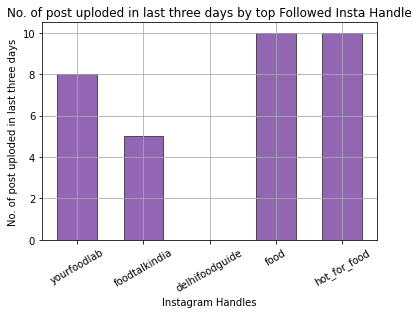

In [18]:
import matplotlib.pyplot as plt 
plt.bar(top5_handles,postuploaded_last3days,color = "indigo",alpha =0.6,edgecolor ='black',width =0.6)
plt.grid(color ="darkgrey")
plt.xticks(rotation =30)
plt.xlabel("Instagram Handles")
plt.ylabel("No. of post uploded in last three days")
plt.title("No. of post uploded in last three days by top Followed Insta Handle")
plt.show()

# Question 2

# Question 2.1

•	Open the top 5 handles by appending the base addres followed by handle name scrape  content of the first 10 posts of each handle.

•	scrape  content of the first 10 posts of each handle. From the words scrapped store the word starting with hashtag.

•	Opening first post and scrape all the words starting with # and store it in a list.

•	After this click on next post and again repeat above task.


In [19]:
base_url = 'https://www.instagram.com/'
hashtag_lis =[]
for i in top5_handles:
    url = base_url+i+'/'
    driver.get(url)
    like_post = driver.find_element_by_class_name("_9AhH0")
    like_post.click()
    for i in range(10):
        try:
            hashtag = driver.find_elements_by_css_selector("a.xil3i")
            for k in range(len(hashtag)):
                hashtag_lis.append(hashtag[k].text)
            next_page = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
            next_page.click()
        except (NoSuchElementException ):
            next_page = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
            next_page.click()
    clo = driver.find_element_by_css_selector('div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
    clo.click()

# Question 2.2

•	Store the word stored in list into a dictionary . 

•	This ill give the frequency of each word


In [20]:
hashtag_lis


['#YouTubeCreatorAwards',
 '#recipes',
 '#chicken',
 '#chickensofinstagram',
 '#chickenwings',
 '#chickenrecipes',
 '#chickenlover',
 '#chickenlollipop',
 '#foodstylist',
 '#mumbaistreetfood',
 '#sanjyotkeer',
 '#mouthwateringfood',
 '#recipe',
 '#foodiesofinstagram',
 '#streetfood',
 '#wontons',
 '#sanjyotkeer',
 '#foodstyling',
 '#instagram',
 '#foodporn',
 '#soupseason',
 '#souprecipe',
 '#flatlaysoftheday',
 '#flatlaysquad',
 '#flatlays',
 '#flatlaystyles',
 '#flatlayphotography',
 '#aesthetic',
 '#wontonsoup',
 '#punediaries',
 '#maharashtra_igers',
 '#maharashtra_ig',
 '#pintrest',
 '#wontonsoup',
 '#sanjyotkeer',
 '#foodforfoodies',
 '#souplover',
 '#recipe',
 '#foodie',
 '#indiancuisine',
 '#streetfood',
 '#streetfoodindia',
 '#sanjyotkeer',
 '#foodporn',
 '#recipes',
 '#foodstagram',
 '#paratha',
 '#alooparatha',
 '#yummilicious',
 '#foodiesofinstagram',
 '#parathas',
 '#breakfastideas',
 '#homemadefood',
 '#recipe',
 '#foodie',
 '#indiancuisine',
 '#foodiesofinstagram',
 '#st

In [21]:
hashtag_dic ={}
for i in hashtag_lis:
    hashtag_dic[i] = hashtag_dic.get(i,0)+1

In [22]:
hashtag_dic

{'#YouTubeCreatorAwards': 1,
 '#recipes': 3,
 '#chicken': 1,
 '#chickensofinstagram': 1,
 '#chickenwings': 1,
 '#chickenrecipes': 1,
 '#chickenlover': 1,
 '#chickenlollipop': 1,
 '#foodstylist': 1,
 '#mumbaistreetfood': 2,
 '#sanjyotkeer': 6,
 '#mouthwateringfood': 1,
 '#recipe': 5,
 '#foodiesofinstagram': 5,
 '#streetfood': 8,
 '#wontons': 1,
 '#foodstyling': 1,
 '#instagram': 1,
 '#foodporn': 3,
 '#soupseason': 1,
 '#souprecipe': 1,
 '#flatlaysoftheday': 1,
 '#flatlaysquad': 1,
 '#flatlays': 1,
 '#flatlaystyles': 1,
 '#flatlayphotography': 1,
 '#aesthetic': 1,
 '#wontonsoup': 2,
 '#punediaries': 1,
 '#maharashtra_igers': 1,
 '#maharashtra_ig': 1,
 '#pintrest': 1,
 '#foodforfoodies': 1,
 '#souplover': 1,
 '#foodie': 3,
 '#indiancuisine': 3,
 '#streetfoodindia': 1,
 '#foodstagram': 1,
 '#paratha': 1,
 '#alooparatha': 1,
 '#yummilicious': 1,
 '#parathas': 1,
 '#breakfastideas': 1,
 '#homemadefood': 1,
 '#favouritemarathidish': 1,
 '#monsoons': 1,
 '#sinhagadfort': 1,
 '#foodphotography'

In [23]:
res = dict(sorted(hashtag_dic.items(), key = itemgetter(1), reverse = True))
res

{'#delhifoodblogger': 14,
 '#delhifoodguide': 10,
 '#heresmyfood': 10,
 '#foodgasm': 9,
 '#vegan': 9,
 '#foodblogger': 9,
 '#streetfood': 8,
 '#healthyfood': 8,
 '#veganworldshare': 7,
 '#buzzfeedfood': 7,
 '#hotforfood': 7,
 '#delhistreetfood': 7,
 '#indianfood': 7,
 '#sanjyotkeer': 6,
 '#mumbaifoodie': 6,
 '#recipevideo': 6,
 '#eeeeeats': 6,
 '#studentblogger': 6,
 '#recipe': 5,
 '#foodiesofinstagram': 5,
 '#foodphotography': 5,
 '#homecooking': 5,
 '#recetasvegetarianas': 5,
 '#sambhar': 5,
 '#southindianfood': 5,
 '#mumbai': 4,
 '#southdelhi': 4,
 '#delhifood': 4,
 '#delhifoodblog': 4,
 '#receitavegetariana': 4,
 '#indianstreetfood': 4,
 '#recipes': 3,
 '#foodporn': 3,
 '#foodie': 3,
 '#indiancuisine': 3,
 '#delhilifestyleblogger': 3,
 '#googlelocalguides': 3,
 '#kolkatagram': 3,
 '#sodelhi': 3,
 '#lbbdelhi': 3,
 '#reelsinstagram': 3,
 '#india': 3,
 '#foodlover': 3,
 '#noida': 3,
 '#foods': 3,
 '#fusionfood': 3,
 '#idli': 3,
 '#dosa': 3,
 '#mumbaistreetfood': 2,
 '#wontonsoup': 2,


In [24]:
main_lis = []
for i in res:
    temp = []
    temp.append(i)
    temp.append(res[i])
    main_lis.append(temp)

In [25]:
main_lis

[['#delhifoodblogger', 14],
 ['#delhifoodguide', 10],
 ['#heresmyfood', 10],
 ['#foodgasm', 9],
 ['#vegan', 9],
 ['#foodblogger', 9],
 ['#streetfood', 8],
 ['#healthyfood', 8],
 ['#veganworldshare', 7],
 ['#buzzfeedfood', 7],
 ['#hotforfood', 7],
 ['#delhistreetfood', 7],
 ['#indianfood', 7],
 ['#sanjyotkeer', 6],
 ['#mumbaifoodie', 6],
 ['#recipevideo', 6],
 ['#eeeeeats', 6],
 ['#studentblogger', 6],
 ['#recipe', 5],
 ['#foodiesofinstagram', 5],
 ['#foodphotography', 5],
 ['#homecooking', 5],
 ['#recetasvegetarianas', 5],
 ['#sambhar', 5],
 ['#southindianfood', 5],
 ['#mumbai', 4],
 ['#southdelhi', 4],
 ['#delhifood', 4],
 ['#delhifoodblog', 4],
 ['#receitavegetariana', 4],
 ['#indianstreetfood', 4],
 ['#recipes', 3],
 ['#foodporn', 3],
 ['#foodie', 3],
 ['#indiancuisine', 3],
 ['#delhilifestyleblogger', 3],
 ['#googlelocalguides', 3],
 ['#kolkatagram', 3],
 ['#sodelhi', 3],
 ['#lbbdelhi', 3],
 ['#reelsinstagram', 3],
 ['#india', 3],
 ['#foodlover', 3],
 ['#noida', 3],
 ['#foods', 3],

# Question 2.3

•	Create list of list for each word and frequency in the dictionary.

•	Then store it into a list

•	Use pandas library to concert this list into a csv file

•	Csv file is stored as hashtag_frequency.csv

•	Remove the indexing in the csv file.


## Creating Csv file

In [26]:
import pandas as pd
csv_file=pd.DataFrame(main_lis,columns=["Words","Frequency"]) ## creating dataframe
csv_file.to_csv("hashtag_frequency.csv",index=False)  ## saving dataframe in same directory 
csv_file

,Words,Frequency
0,#delhifoodblogger,14
1,#delhifoodguide,10
2,#heresmyfood,10
3,#foodgasm,9
4,#vegan,9
...,...,...
189,#fashionblogger,1
190,#delhibeautyblogger,1
191,#khaosuey,1
192,#idlis,1


# Question 2.4

•	Sort the dictionary in descending order using

•	Top 5 frequently used words and their frequency is:


## top 5 Hashtags

In [27]:
res1 = dict(sorted(hashtag_dic.items(), key = itemgetter(1), reverse = True)[:5])
res1

{'#delhifoodblogger': 14,
 '#delhifoodguide': 10,
 '#heresmyfood': 10,
 '#foodgasm': 9,
 '#vegan': 9}

In [28]:
top_5_hashtags =[]
top_5_hashtags_freq =[]
for i in res1:
    top_5_hashtags.append(i)
    top_5_hashtags_freq.append(res1[i])

# Question 2.5

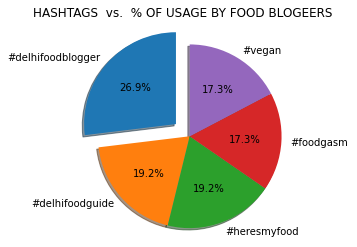

In [30]:
import matplotlib.pyplot as plt
plt.pie(top_5_hashtags_freq,labels =top_5_hashtags,explode = (0.2, 0, 0, 0,0),autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.title("HASHTAGS  vs.  % OF USAGE BY FOOD BLOGEERS")
plt.show()

# Question 3

## Question 3.1

•	Open the top 5 handles by appending the base address followed by handle name scrape  content of the first 10 posts of each handle.

•	scrape  number o likes  of the first 10 posts of each handle and store it  in a list.


In [31]:
base_url = 'https://www.instagram.com/'
no_of_likes_lis =[]

for i in top5_handles:
    url = base_url+i+'/'
    driver.get(url)
    like_post = driver.find_element_by_class_name("_9AhH0")
    like_post.click()
    no_of_likes_lis1 =[]
    for i in range(10):
        try:
            no_of_likes =driver.find_element_by_css_selector("div.Nm9Fw > button.sqdOP.yWX7d._8A5w5 > span")
            temp = no_of_likes.text
            temp1 = temp.replace(",","")
            no_of_likes_lis1.append(int(temp1))
            next_page = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
            next_page.click()
        except (NoSuchElementException ):
            next_page = driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow')
            next_page.click()
    no_of_likes_lis.append(no_of_likes_lis1)
    clo = driver.find_element_by_css_selector('div.Igw0E.IwRSH.eGOV_._4EzTm.BI4qX.qJPeX.fm1AK.TxciK.yiMZG')
    clo.click()

In [32]:
no_of_likes_lis

[[68464, 34716, 19801, 24807, 26269, 30905],
 [318, 415, 447, 519, 445, 725, 1986, 591],
 [832, 785, 1163, 1023, 1539, 924, 1277, 925, 1355, 2877],
 [1599, 1088, 1597, 1484, 1575, 1855, 1476, 1826],
 [62, 568, 388, 239, 1164, 219, 513, 276, 293, 372]]

## Question 3.2

### Average likes post

•	Calculate the sum of the likes received by top 10 post . 

•	calculate the average likes per post by dividing sum of likes received by 10

•	Average post like of top 5 handles are :


In [33]:
Average_like_10_post = []
for i in no_of_likes_lis:
    sum1  = 0
    for j in i:
        sum1 =sum1+j;
    Average_like_10_post.append(sum1/10)

In [34]:
for i in range(len(Average_like_10_post)):
    print(top5_handles[i],Average_like_10_post[i])

yourfoodlab 20496.2
foodtalkindia 544.6
delhifoodguide 1270.0
food 1250.0
hot_for_food 409.4


## Question 3.3

### Average Follower:Like Ratio

•	Divide the numbers of followers of each handle by the average like for each handle . calculated in the  previous. Ques.

In [35]:
average_follower_like_ratio = []
for i in range(len(Average_like_10_post)):
    average_follower_like_ratio.append(top5_handle_followers[i]/Average_like_10_post[i])

In [36]:
average_follower_like_ratio

[68.72581258965076,
 555.2956298200514,
 82.5220472440945,
 64.3,
 166.19931607230095]

In [38]:
for i in range(len(average_follower_like_ratio)):
    print(top5_handles[i],average_follower_like_ratio[i])

yourfoodlab 68.72581258965076
foodtalkindia 555.2956298200514
delhifoodguide 82.5220472440945
food 64.3
hot_for_food 166.19931607230095


## Question 3.4

### Graph Average Follower:Like Ratio

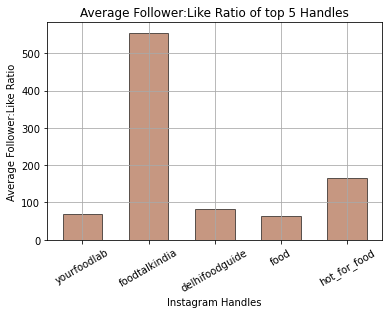

In [39]:
plt.bar(top5_handles,average_follower_like_ratio,color = "sienna",alpha =0.6,edgecolor ='black',width =0.6)
plt.grid(color ="darkgrey")
plt.xticks(rotation =30)
plt.xlabel("Instagram Handles")
plt.ylabel("Average Follower:Like Ratio")
plt.title("Average Follower:Like Ratio of top 5 Handles")
plt.show()